# Introduction

## Package management in Julia


The Julia package manager (`Pkg`) is available by default. It, and any other package, can be fetched into a local session through the `using Pkg` command:

In [ ]:
using Pkg

Next, any registered Julia package (around 10,000 right now) can be installed locally through the `Pkg.add("PackageName")` command. Here we will install Catalyst.jl (for CRN modelling), DifferentialEquations.jl (for simulation), and Plots.jl (for plotting).

In [ ]:
Pkg.add("Catalyst")
Pkg.add("DifferentialEquations")
Pkg.add("Plots")

Each time a new Julia session is started, we have to run `using PackageName` to be able to use a certain package. However, `Pkg.add("PackageName")` only have to be run once on each machine.  

In [2]:
using Catalyst, DifferentialEquations, Plots

(In the remaining workshop parts, we will assume packages are already installed, if you encounter a package that is not, you can install it using the above method)

If someone have already created an Julia environment in a folder (you can see this by the folder containing a "Project.toml" and a "Manifest.toml" file), you can automatically download the corresponding packages using the `Pkg.instantiate()` command. First we need to run `Pck.activate(".")` to activate the local environment though.

In [ ]:
Pkg.activate(".")
Pkg.instantiate()

## Creating and simulating a simple chemical reaction network ODE model

We can create a CRN model using the `@reaction_network` macro exported my Catalyst. It allows us to declare the model using classic chemical reaction notation. Here we create a simple birth/death model, where a single species (`X`) is produced (at rate `p`) and degraded (at rate `d`).  

In [3]:
crn = @reaction_network begin
    p, 0 --> X
    d, X --> 0
end

Model ##ReactionSystem#230
States (1):
  X(t)
Parameters (2):
  p
  d

Next, by setting initial conditions, parameter values, and a time span, we can create a `ODEProblem`. This can be simualted using the `solve` function.

In [4]:
u0 = [:X => 1.0]
tspan = (0.0, 10.0)
ps = [:p => 1.0, :d => 0.2]
ode_prob = ODEProblem(crn, u0, tspan, ps)
ode_sol = solve(ode_prob);

We can plot the result using the `plot` function.

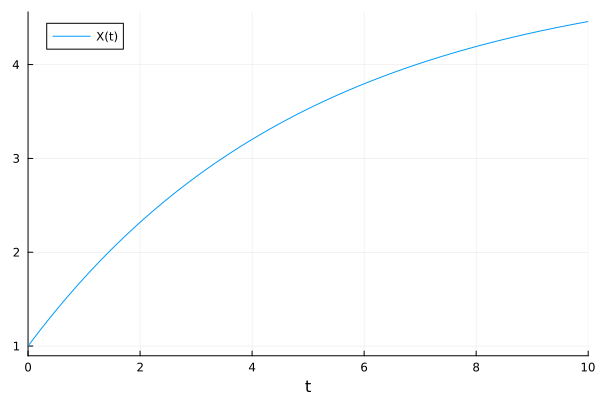

In [6]:
plot(ode_sol)

### SDE and Gillespie simulations

We can run a (chemical Langevin equation based) SDE simulation simply by replacing `ODEProblem` by `SDEProblem`:

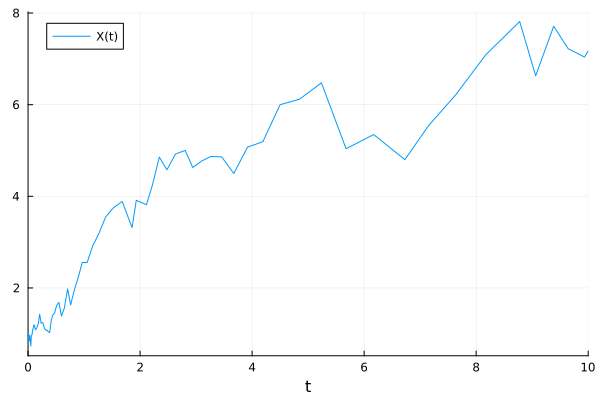

In [7]:
u0 = [:X => 1.0]
tspan = (0.0, 10.0)
ps = [:p => 1.0, :d => 0.2]
sde_prob = SDEProblem(crn, u0, tspan, ps)

sde_sol = solve(sde_prob)
plot(sde_sol)

Finally, Gillespie simulations can be run by first creating a `DiscreteProblem` and then a `JumpProblem`. We will also specify which simulation algorithm to use (here we use Gillespie's direct method, `Direct`).

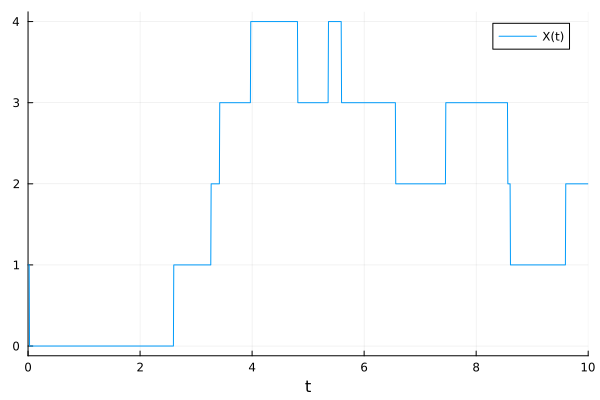

In [8]:
u0 = [:X => 1]
tspan = (0.0, 10.0)
ps = [:p => 1.0, :d => 0.2]
d_prob = DiscreteProblem(crn, u0, tspan, ps)
j_prob = JumpProblem(crn, d_prob, Direct())

j_sol = solve(j_prob, SSAStepper())   # For pure jump simulations, `SSAStepper()` is always used here.
plot(j_sol)

(In future interface, which is awaiting better hybrid ODE/Jump support, a `JumpProblem` will likely be created directly from the simulation conditions)